# WRM Stiffness Degradation model with 2 features(Perp interface,Perp matrix) for T-T Cyclic Load

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

# Importing the dataset
dataset = pd.read_excel('/content/WRM paper 2 per (1).xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Checking for missing values
print(dataset.isnull().sum())

# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initializing and fitting the GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Extracting the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predicting using the test set
y_pred = best_model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Predicting new values
X_new = np.array([[6.02074E-4, 2.28845E-4 ]])  # Replace with actual new values
y_pred_new = best_model.predict(X_new)
print("Predicted Value for New Data:", y_pred_new)


X1    0
X2    0
Y     0
dtype: int64
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'poly'}
R^2 Score: 0.9648355112501555
Mean Squared Error: 6.297753786670714e-05
Predicted Value for New Data: [0.94387075]


In [ ]:
# Predicting using the test set
y_pred_train_WRM = best_model.predict(X_train)
print("R^2 Score:", r2_score(y_train, y_pred_train_WRM))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_WRM))

R^2 Score: 0.9763779232841461
Mean Squared Error: 5.32730430749014e-05


R^2 Score: 0.9648355112501555
Mean Squared Error: 6.297753786670714e-05


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

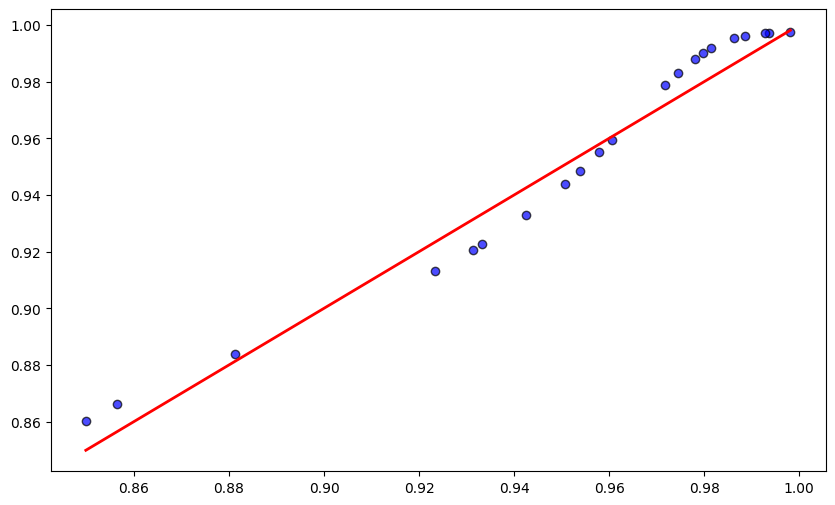

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Predicting the test set results
y_pred = best_model.predict(X_test)

# Evaluating the model on the test data
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values for the test set
results_df_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Saving the DataFrame to a CSV file
results_df_test.to_csv('actual_vs_predicted_test_wrm.csv', index=False)

# Plotting actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(results_df_test['Actual'], results_df_test['Predicted'], color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(results_df_test['Actual']), max(results_df_test['Actual'])],
         [min(results_df_test['Actual']), max(results_df_test['Actual'])], color='red', lw=2)  # Diagonal line
plt


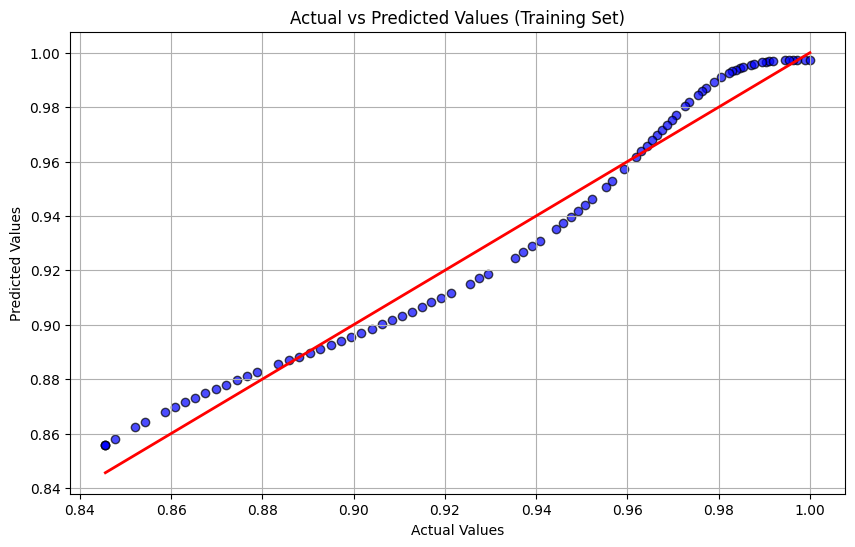

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Predicting the training set results
# y_train_pred = best_model.predict(X_train)

# Creating a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_train,
    'Predicted': y_pred_train_WRM
})

# Saving the DataFrame to a CSV file
results_df.to_csv('actual_vs_predicted_train_WRM.csv', index=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(results_df['Actual']), max(results_df['Actual'])],
         [min(results_df['Actual']), max(results_df['Actual'])], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Values (Training Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


# CSM Stiffness Degradation model with 3 features(Perp interface, Parallel interface, Perp matrix, ) for T-T Cyclic Load

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error

# Importing the dataset
dataset = pd.read_excel('/content/CSM paper 2 data (2).xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Checking for missing values
print(dataset.isnull().sum())

# Imputing missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train_CSM, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['poly', 'rbf']
}

# Initializing and fitting the GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_CSM)

# Extracting the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predicting using the test set
y_pred = best_model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Predicting new values
X_new = np.array([[1.77778E-4, 9.31217E-5, 4.40212E-4]])  # Replace with actual new values
y_pred_new = best_model.predict(X_new)
print("Predicted Value for New Data:", y_pred_new)

X1    0
X2    0
X3    0
Y     0
dtype: int64
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'poly'}
R^2 Score: 0.8221963680937684
Mean Squared Error: 3.332197428313085e-05
Predicted Value for New Data: [0.98456931]


R^2 Score: 0.8221963680937684
Mean Squared Error: 3.332197428313085e-05


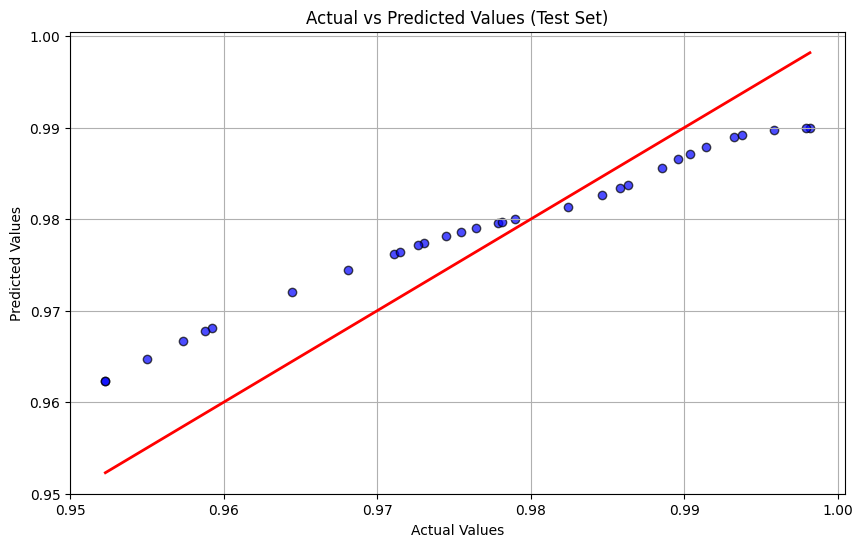

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# Predicting using the test set
y_pred = best_model.predict(X_test)

# Evaluating the model on the test data
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Creating a DataFrame with actual and predicted values for the test set
results_df_test = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Saving the DataFrame to a CSV file
results_df_test.to_csv('actual_vs_predicted_test_CSM.csv', index=False)

# Plotting actual vs. predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(results_df_test['Actual'], results_df_test['Predicted'], color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(results_df_test['Actual']), max(results_df_test['Actual'])],
         [min(results_df_test['Actual']), max(results_df_test['Actual'])], color='red', lw=2)  # Diagonal line
plt.title('Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


R^2 Score: 0.8194513081710695
Mean Squared Error: 3.1940047828540684e-05


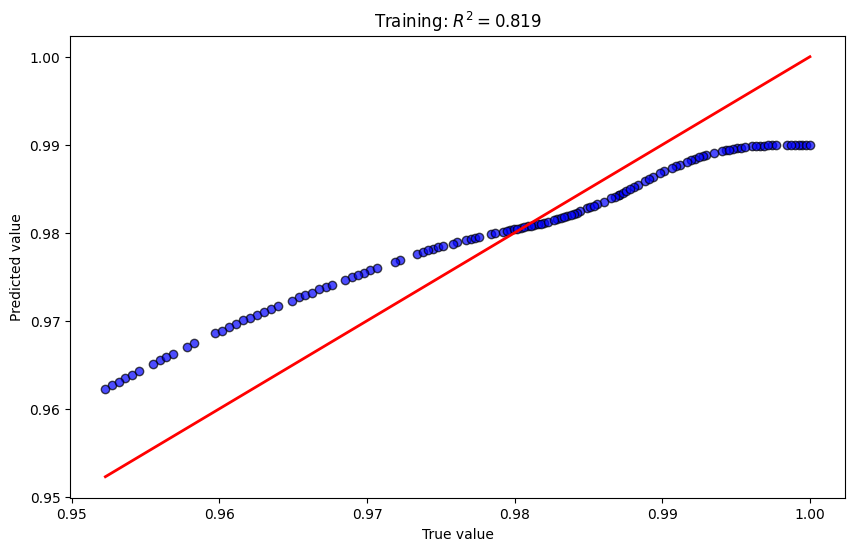

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming y_train_CSM is defined and corresponds to X_train
y_train_pred_CSM = best_model.predict(X_train)

# Creating a DataFrame with actual and predicted values
results_df_CSM = pd.DataFrame({
    'Actual_CSM': y_train_CSM,
    'Predicted_CSM': y_train_pred_CSM
})
print("R^2 Score:", r2_score(y_train_CSM, y_train_pred_CSM))
print("Mean Squared Error:", mean_squared_error(y_train_CSM, y_train_pred_CSM))
# Saving the DataFrame to a CSV file
results_df_CSM.to_csv('actual_vs_predicted_train_CSM.csv', index=False)

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df_CSM['Actual_CSM'], results_df_CSM['Predicted_CSM'], color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(results_df_CSM['Actual_CSM']), max(results_df_CSM['Actual_CSM'])],
         [min(results_df_CSM['Actual_CSM']), max(results_df_CSM['Actual_CSM'])], color='red', lw=2)  # Diagonal line
plt.title('Training: $R^2 = {0.819}$')
plt.xlabel('True value')
plt.ylabel('Predicted value')
# plt.grid(True)
plt.show()
